<a href="https://colab.research.google.com/github/Praneet-Prabhanjan/EV_Market_segmentation_analysis/blob/main/Dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,PowerTransformer

In [4]:
data = pd.read_csv('/content/dataset_2.csv')

In [5]:
#converting attributes to list
data.columns.values.tolist()

['name', 'state', 'city', 'address', 'lattitude', 'longitude', 'type']

In [6]:
#defining dimensions of data_set
data.shape

(1547, 7)

In [7]:
data.head

<bound method NDFrame.head of                                                    name          state  \
0                    Neelkanth Star DC Charging Station        Haryana   
1                          Galleria DC Charging Station        Haryana   
2     Highway Xpress (Jaipur-Delhi) DC charging station      Rajasthan   
3                     Food Carnival DC Charging Station  Uttar Pradesh   
4                     Food Carnival AC Charging Station  Uttar Pradesh   
...                                                 ...            ...   
1542                                        Tata Power          Kerala   
1543                                        Tata Power         Haryana   
1544                                        Tata Power         Haryana   
1545                                        Tata Power           Jammu   
1546                                        Tata Power       Karnataka   

           city                                            address  \
0      Guru

In [8]:
features = ['name', 'state', 'city', 'address', 'lattitude', 'longitude', 'type']

In [9]:
#drop null values if present
data.dropna(subset = features)

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.980300,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.081800,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.276000,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.721800,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.721800,12.0
...,...,...,...,...,...,...,...
1542,Tata Power,Kerala,Munnar,"Gokulam Park Munnar, Power House Road, South C...",10.0297934,77.045859,7.0
1543,Tata Power,Haryana,Gurgaon,"Vatika Town Square II, Sector 82, Sector 82, V...",28.3904593,76.959200,7.0
1544,Tata Power,Haryana,Gurgaon,"Zedex TATA, Sec 48, GF-26, NIHO Scottish Mall,...",28.411072,77.040546,7.0
1545,Tata Power,Jammu,Jammu,"Le ROI, Jammu, Railway Station, Jammu, Jammu &...",32.7064117,74.879203,7.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   lattitude  1541 non-null   object 
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(2), object(5)
memory usage: 84.7+ KB


In [11]:
data.isnull().sum()

name          0
state         0
city          0
address      40
lattitude     6
longitude     6
type          8
dtype: int64

In [12]:
#Descriptive stats
data.describe()

,longitude,type
count,1.541000e+03,1539.000000
mean,1.105323e+05,9.020793
std,3.064996e+06,4.136436
min,8.058454e+00,6.000000
25%,7.562036e+01,7.000000
50%,7.721257e+01,7.000000
75%,7.847983e+01,11.000000
max,8.510551e+07,24.000000


In [13]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
data['state'] = label_encoder.fit_transform(data['name'])
data['state'] = label_encoder.fit_transform(data['state'])
data['city'] = label_encoder.fit_transform(data['city'])
data['city'] = label_encoder.fit_transform(data['address'])
data['city'] = label_encoder.fit_transform(data['lattitude'])
data['city'] = label_encoder.fit_transform(data['longitude'])
data['type'] = label_encoder.fit_transform(data['type'])
data

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,804,502,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.980300,5
1,Galleria DC Charging Station,417,539,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.081800,5
2,Highway Xpress (Jaipur-Delhi) DC charging station,487,397,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.276000,5
3,Food Carnival DC Charging Station,393,826,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.721800,5
4,Food Carnival AC Charging Station,392,826,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.721800,5
...,...,...,...,...,...,...,...
1542,Tata Power,1017,522,"Gokulam Park Munnar, Power House Road, South C...",10.0297934,77.045859,1
1543,Tata Power,1017,489,"Vatika Town Square II, Sector 82, Sector 82, V...",28.3904593,76.959200,1
1544,Tata Power,1017,517,"Zedex TATA, Sec 48, GF-26, NIHO Scottish Mall,...",28.411072,77.040546,1
1545,Tata Power,1017,284,"Le ROI, Jammu, Railway Station, Jammu, Jammu &...",32.7064117,74.879203,1


             state         city     longitude         type
count  1547.000000  1547.000000  1.541000e+03  1547.000000
mean    586.426632   619.253394  1.105323e+05     2.828054
std     330.960084   351.300886  3.064996e+06     3.907092
min       0.000000     0.000000  8.058454e+00     0.000000
25%     297.000000   316.500000  7.562036e+01     1.000000
50%     591.000000   621.000000  7.721257e+01     1.000000
75%     883.000000   926.500000  7.847983e+01     4.000000
max    1143.000000  1202.000000  8.510551e+07    18.000000


<ipython-input-14-6992eabe5c76>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


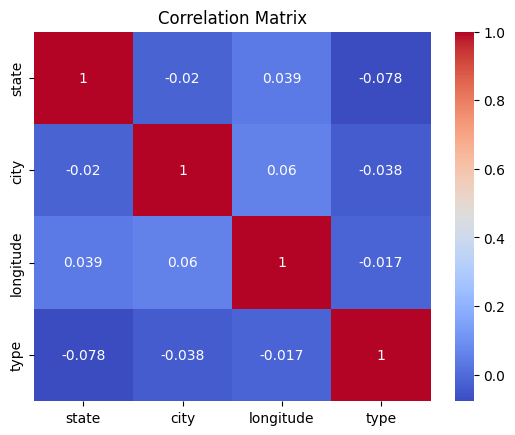

In [14]:
print(data.describe())

# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

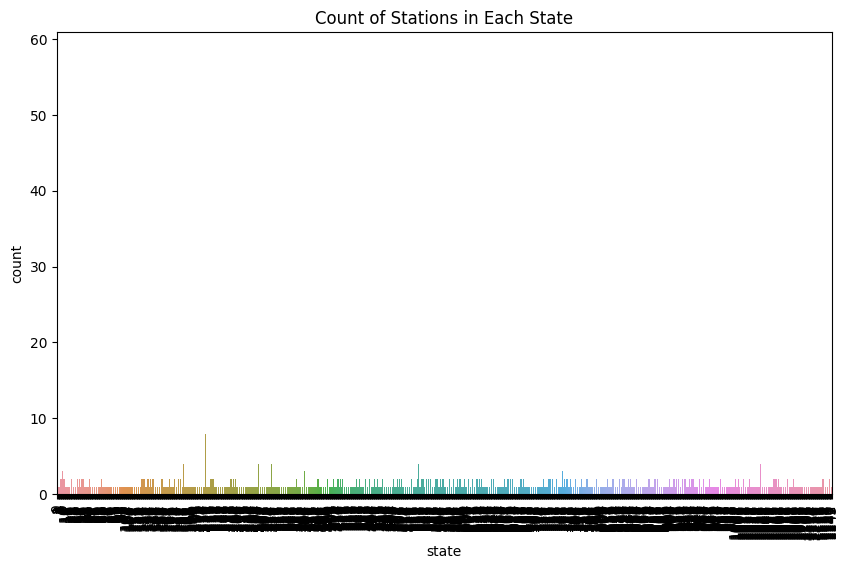

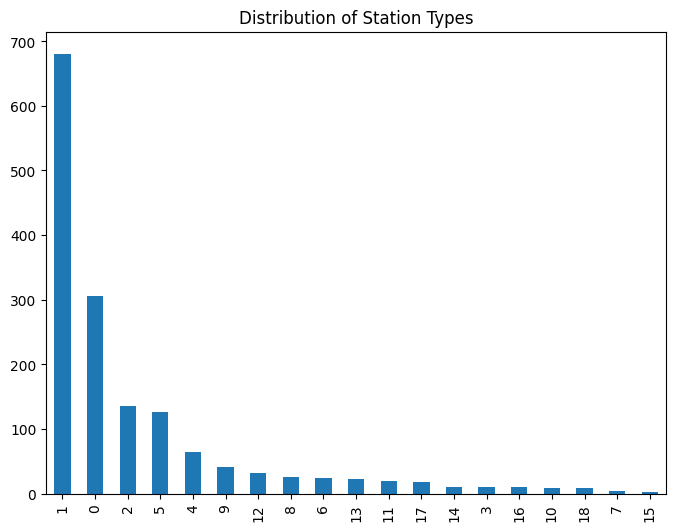

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='state')
plt.xticks(rotation=90)
plt.title("Count of Stations in Each State")
plt.show()

# Distribution of station types
plt.figure(figsize=(8, 6))
data['type'].value_counts().plot(kind='bar')
plt.title("Distribution of Station Types")
plt.show()

In [16]:
print(data['state'])

0        804
1        417
2        487
3        393
4        392
        ... 
1542    1017
1543    1017
1544    1017
1545    1017
1546    1017
Name: state, Length: 1547, dtype: int64


In [17]:
selected_column = 'state'
# Find and print the unique values
unique_values = data[selected_column].unique()
unique_values = data[selected_column].unique()

# Print the unique values as strings
for value in unique_values:
    print(value)

804
417
487
393
392
694
907
906
909
908
803
268
999
622
1079
1081
617
614
604
693
1127
771
713
479
503
1046
1123
682
988
639
768
605
1025
877
998
637
224
769
463
465
471
467
1120
420
419
62
16
878
770
486
994
764
887
777
1121
690
527
828
993
1035
743
376
462
529
521
501
255
1138
1080
700
795
1075
1076
464
962
189
1073
35
1056
797
246
851
474
941
375
937
1042
499
805
806
1003
547
497
943
744
645
1004
171
526
1010
1011
767
944
942
510
45
377
535
991
67
1
1000
221
723
722
680
724
683
181
698
759
721
989
844
829
778
266
395
845
413
822
853
849
235
633
1043
383
1041
41
440
1007
111
899
695
854
396
51
70
195
42
934
118
117
1027
43
212
997
177
390
1014
925
556
678
238
1015
656
931
913
1082
213
79
717
808
889
401
400
211
1034
1023
967
180
1083
258
649
966
276
198
697
992
214
32
784
2
169
892
990
720
253
673
715
115
811
719
391
409
448
511
692
275
1048
825
827
809
25
77
204
205
68
1092
1030
187
711
92
654
557
94
1052
674
1067
1053
964
0
208
525
59
247
972
168
1069
236
826
80
97
483
1141
477
788

In [18]:
value_counts = data['state'].value_counts()

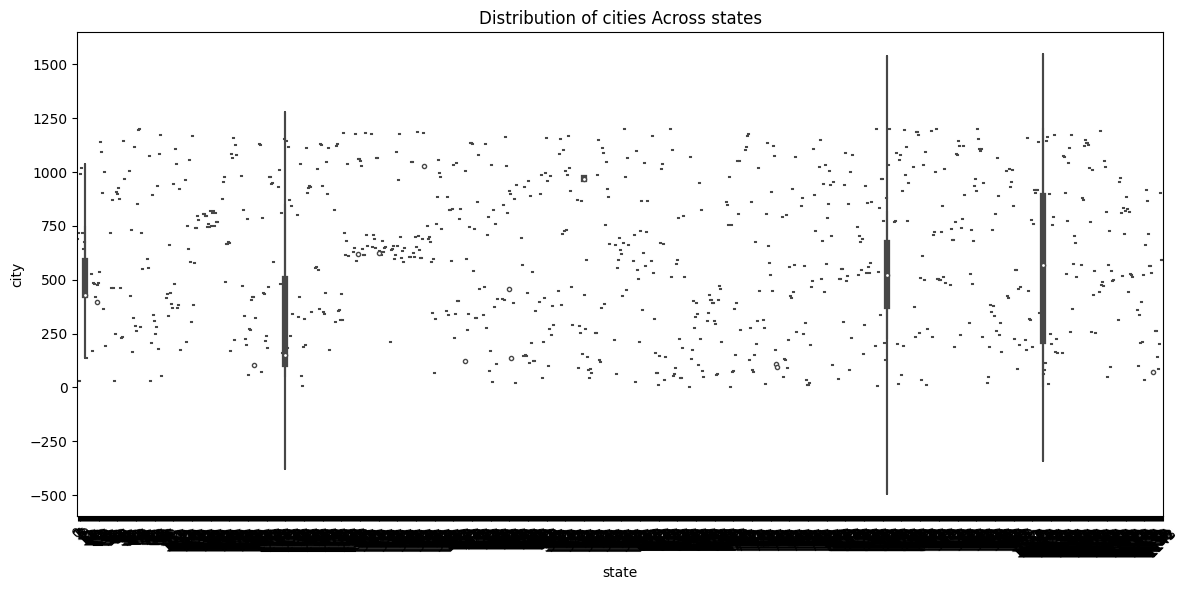

In [19]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='state', y='city', data=data, palette='rainbow')
plt.xlabel('state')
plt.ylabel('city')
plt.title('Distribution of cities Across states')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

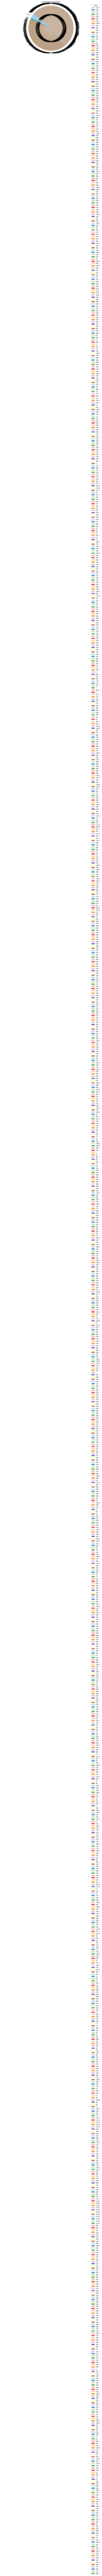

In [20]:
plt.figure(figsize=(12, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribution of Cities")
plt.legend(title="Cities")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

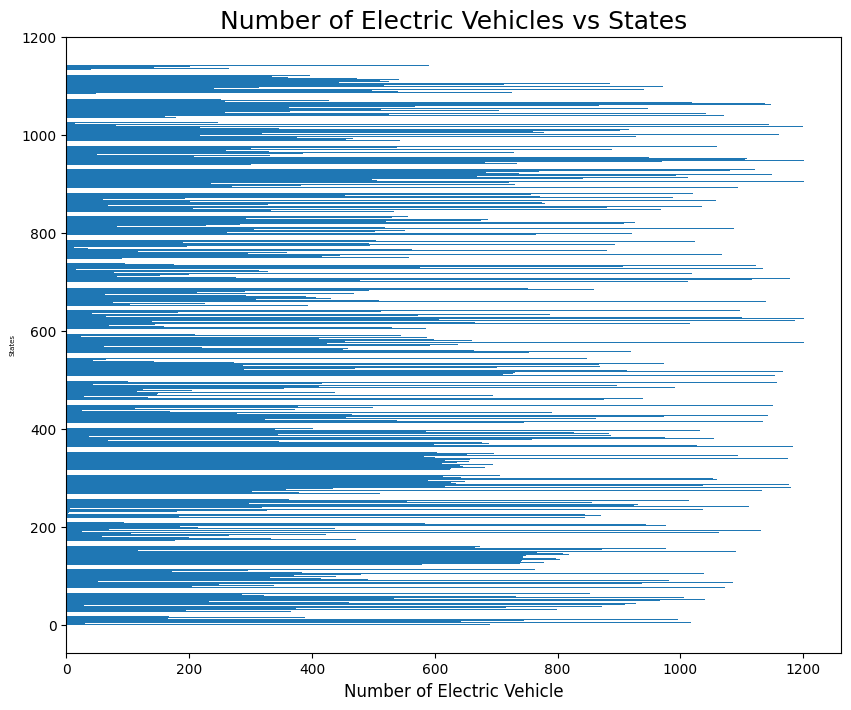

In [21]:
plt.figure(figsize=(10,8))
plt.barh(data["state"],data["city"])
plt.title("Number of Electric Vehicles vs States", fontsize=18)
plt.xlabel("Number of Electric Vehicle", fontsize=12)
plt.ylabel("States", fontsize=5)
plt.xticks(rotation=0)
plt.show()

#['name', 'state', 'city', 'address', 'lattitude', 'longitude', 'type']

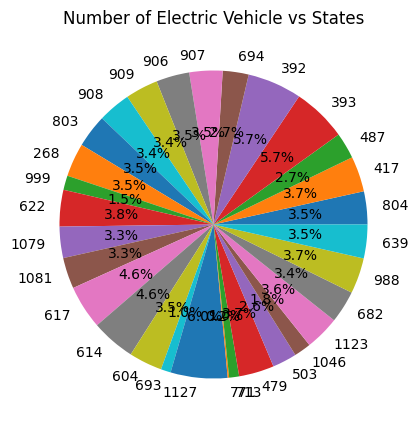

In [22]:
top5 = data[:30]
plt.figure(figsize=(5,5))
plt.title("Number of Electric Vehicle vs States")
plt.pie(top5["city"], labels=top5["state"], autopct='%1.1f%%')
plt.show()

In [23]:
data_encoded = pd.get_dummies(data, columns=['name','address','lattitude', 'longitude'])  # Perform one-hot encoding
X = data_encoded.drop('type', axis=1)
y = data_encoded['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


Accuracy: 0.5870967741935483


RandomForestClassifier(random_state=42)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Replace missing values in 'address' column with an empty string
data['address'].fillna('', inplace=True)

# Preprocess 'address' column
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Adjust max_features as needed
address_features = tfidf_vectorizer.fit_transform(data['address']).toarray()

# Convert the transformed features into a DataFrame
address_df = pd.DataFrame(address_features, columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the new address features with the original DataFrame
data = pd.concat([data, address_df], axis=1)

# Now you can drop the 'address' column and proceed with the machine learning model
X = data.drop(['type', 'address'], axis=1)
y = data['type']

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # or 'micro', 'macro', 'binary', etc.
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # or 'micro', 'macro', 'binary', etc.
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  # or 'micro', 'macro', 'binary', etc.
print("F1-score:", f1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.5870967741935483
Precision: 0.5870078291462266
Recall: 0.5870967741935483
F1-score: 0.5274972294936466
Confusion Matrix:
[[ 19  45   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 11 130   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   2  17   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  2   7   0   0   7   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  23   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  1   0   3   0   0   0   0   3   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
accuracy_percentage = accuracy * 100
precision_percentage = precision * 100
recall_percentage = recall * 100
f1_percentage = f1 * 100

print("Accuracy (%):", accuracy_percentage)
print("Precision (%):", precision_percentage)
print("Recall (%):", recall_percentage)
print("F1-score (%):", f1_percentage)

Accuracy (%): 58.70967741935483
Precision (%): 58.700782914622664
Recall (%): 58.70967741935483
F1-score (%): 52.74972294936467
